In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import date

from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline

from scipy import stats
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split
from sklearn import datasets

import matplotlib as plt
import seaborn as sns

import matplotlib.pyplot as plt
import scipy as sp 
import seaborn as sns
import itertools
import scipy.stats as ssp
%matplotlib inline
import seaborn as sns

import scipy.stats as st

import ipywidgets as widgets
from IPython.display import display

import matplotlib.pyplot as plt
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
df=pd.read_csv('portal-offers-05.06.2020.csv')

C:\Users\48500\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df2=df[(df.main_type_name == 'mieszkanie')]
#df.loc[[df['main_type_name']=='dom' or df['main_type_name']== 'mieszkanie']]

In [4]:
df3=df2[(df2.transaction_name == 'sprzedaż')]

In [5]:
df3.drop(columns=['portal_id','main_type_id','transaction','transaction_name','id','description','location_district_name','raw_data'],inplace=True)

C:\Users\48500\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
df3['location_latitude'] = pd.to_numeric(df3.location_latitude, errors='coerce')

C:\Users\48500\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
df3['location_longitude'] = pd.to_numeric(df3.location_longitude, errors='coerce')

C:\Users\48500\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
df3[['location_latitude','location_longitude']] = df3[['location_latitude','location_longitude']].replace(',','.')

C:\Users\48500\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [9]:
df4=df3[(df3['location_latitude'].notnull()) & (df3['location_longitude'].notnull())]

In [10]:
var_house=df4[['price', 'area_total', 'price_permeter']].apply(pd.to_numeric, errors='coerce')

In [11]:

df5=df4.merge(var_house, left_index=True, right_index=True)

In [12]:
df6=df5.drop(columns=['price_x','area_total_x','price_permeter_x'])

In [13]:
df6.area_total_y=np.where(df6.area_total_y.isnull(),df6.price_y/df6.price_permeter_y,df6.area_total_y)

In [14]:
df6.price_permeter_y=np.where(df6.price_permeter_y.isnull(),df6.price_y/df6.area_total_y,df6.price_permeter_y)

In [15]:
df6.apartment_floor.fillna(0,inplace=True)
#jeżeli 'apartment_room' to liczba pokoi a nie wszystkich pomieszczeń
df6.apartment_room_number.fillna(1,inplace=True)

In [16]:
convert_dict = {'apartment_room_number': int,
                'apartment_floor': int
               }

In [17]:
df7=df6.astype(convert_dict)

In [18]:
ilo=df7.building_year.isnull().sum()/df7.building_year.sum()
ilo
#stanowi to 0.5% więc można usunąc te wyniki bądź spróbować znaleźć, poprzez kmean albo inny model jaki powinen być wiek budynku
#na ten moment ja wyrzucam
df8 = df7[df7.building_year.notnull()]
# analiza tylko tych obiektów, które posiadają cene
df9 = df8[df8.price_y.notnull()]

In [19]:
#df9

In [20]:
df9.columns = ['portal',  'typ', 'liczba_pokoi', 'pietro', 'building_floornumber',  'rok_budowy',  'szerokosc_geo',
                   'dlugosc_geo', 'wojewodztwo',  'miasto', 'dzielnica',  'ulica', 'add_date', 'update_date', 'last_scan_date',  'source_add_date',  'source_update_date', 'private_offer', 'cena',  'powierzchnia',  'cena_m2']

In [21]:
# df9

In [22]:
spr = df9[['typ', 'cena', 'cena_m2', 'liczba_pokoi',  'pietro',  'rok_budowy',
                   'wojewodztwo',  'miasto', 'powierzchnia']]

In [23]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [24]:
spr.wojewodztwo.loc[spr.wojewodztwo.str.startswith('Dolnośląskie')] = 'dolnoslaskie'
spr.wojewodztwo.loc[spr.wojewodztwo.str.startswith('Dolnoslaskie')] = 'dolnoslaskie'
spr.wojewodztwo.loc[spr.wojewodztwo.str.startswith('Zachodniopomorskie')] = 'zachodniopomorskie'
spr.wojewodztwo.loc[spr.wojewodztwo.str.startswith('Mazowieckie')] = 'mazowieckie'
spr.wojewodztwo.loc[spr.wojewodztwo.str.startswith('Małopolskie')] = 'malopolskie'
spr.wojewodztwo.loc[spr.wojewodztwo.str.startswith('Malopolskie')] = 'malopolskie'
spr.wojewodztwo.loc[spr.wojewodztwo.str.startswith('Podlaskie')] = 'podlaskie'
spr.wojewodztwo.loc[spr.wojewodztwo.str.startswith('Pomorskie')] = 'pomorskie'
spr.wojewodztwo.loc[spr.wojewodztwo.str.startswith('Podkarpackie')] = 'podkarpackie'
spr.wojewodztwo.loc[spr.wojewodztwo.str.startswith('Kujawsko-Pomorskie')] = 'kujawsko-pomorskie'
spr.wojewodztwo.loc[spr.wojewodztwo.str.startswith('Lubelskie')] = 'lubelskie'
spr.wojewodztwo.loc[spr.wojewodztwo.str.startswith('Lubuskie')] = 'lubuskie'
spr.wojewodztwo.loc[spr.wojewodztwo.str.startswith('Lódzkie')] = 'lodzkie'
spr.wojewodztwo.loc[spr.wojewodztwo.str.startswith('Łódzkie')] = 'lodzkie'
spr.wojewodztwo.loc[spr.wojewodztwo.str.startswith('Śląskie')] = 'slaskie'
spr.wojewodztwo.loc[spr.wojewodztwo.str.startswith('Slaskie')] = 'slaskie'
spr.wojewodztwo.loc[spr.wojewodztwo.str.startswith('Swietokrzyskie')] = 'swietokrzyskie'
spr.wojewodztwo.loc[spr.wojewodztwo.str.startswith('Świętokrzyskie')] = 'swietokrzyskie'
spr.wojewodztwo.loc[spr.wojewodztwo.str.startswith('Wielkopolskie')] = 'wielkopolskie'
spr.wojewodztwo.loc[spr.wojewodztwo.str.startswith('Warmińsko-Mazurskie')] = 'warminsko-mazurskie'
spr.wojewodztwo.loc[spr.wojewodztwo.str.startswith('Warminsko-Mazurskie')] = 'warminsko-mazurskie'
spr.wojewodztwo.loc[spr.wojewodztwo.str.startswith('Opolskie')] = 'opolskie'

C:\Users\48500\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\48500\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\48500\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\U

In [25]:
spr1 = spr.dropna(inplace=True)

C:\Users\48500\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
# pomorskie = spr.where(spr.wojewodztwo == 'pomorskie').dropna()
# pomorskie

In [27]:
def rm_out(spr,columns=None):
    if columns:
        columns = columns
    else:
        columns = df.columns
        
    df_out = spr.copy()
    for c in columns:
        q1 = spr[c].quantile(0.25)
        q3 = spr[c].quantile(0.75)
        IRQ = q3 - q1
        df_out = df_out.loc[ (df[c] <= q3 + 1.5 * IRQ) & (df[c] >= q1 - 1.5 * IRQ) ]
        
    df_out.index = range(len(df_out))
    return df_out

In [50]:
spr.describe()

,cena,cena_m2,liczba_pokoi,pietro,rok_budowy,powierzchnia
count,4.952400e+04,49524.000000,49524.000000,49524.000000,49524.000000,49524.000000
mean,4.643442e+05,8209.857365,2.665314,0.178701,2002.326953,75.818882
std,3.694411e+05,3521.259497,0.937301,0.942531,257.593088,1927.625175
min,2.800000e+01,0.287356,1.000000,0.000000,1.000000,1.000000
25%,2.990000e+05,6100.000000,2.000000,0.000000,1988.000000,42.100037
50%,3.944805e+05,7609.000000,3.000000,0.000000,2018.000000,53.800389
75%,5.289750e+05,9691.000000,3.000000,0.000000,2020.000000,67.610422
max,2.000000e+07,135803.000000,11.000000,25.000000,32767.000000,428037.000000


In [29]:
spr[['cena', 'cena_m2', 'liczba_pokoi', 'pietro', 'rok_budowy', 'powierzchnia']].groupby(spr.wojewodztwo).max()

,cena,cena_m2,liczba_pokoi,pietro,rok_budowy,powierzchnia
wojewodztwo,,,,,,
dolnoslaskie,4600000.0,82064.0,8,6,2100.0,17173.576923
kujawsko-pomorskie,1500000.0,22447.0,10,10,2023.0,223.000000
lodzkie,1693788.0,67778.0,10,10,2029.0,5164.000000
lubelskie,2000000.0,15442.0,7,13,2021.0,180.000000
lubuskie,1050000.0,8850.0,5,9,2022.0,157.352478
malopolskie,6900000.0,78530.0,8,10,2920.0,495.013990
mazowieckie,20000000.0,135803.0,11,14,20202.0,428037.000000
opolskie,859000.0,11369.0,6,4,2021.0,208.596406
podkarpackie,769000.0,11393.0,9,4,20201.0,200.000000


In [30]:
spr[['cena', 'cena_m2', 'liczba_pokoi', 'pietro', 'rok_budowy', 'powierzchnia']].groupby(spr.wojewodztwo).min()

,cena,cena_m2,liczba_pokoi,pietro,rok_budowy,powierzchnia
wojewodztwo,,,,,,
dolnoslaskie,19550.0,52.000000,1,0,1.0,11.000000
kujawsko-pomorskie,6800.0,1211.000000,1,0,1.0,1.000000
lodzkie,95000.0,1585.000000,1,0,70.0,8.999970
lubelskie,75000.0,1831.000000,1,0,1.0,20.020020
lubuskie,60000.0,1352.000000,1,0,219.0,23.000898
malopolskie,7200.0,47.000000,1,0,2.0,12.000274
mazowieckie,6000.0,1.000000,1,0,1.0,4.000000
opolskie,27000.0,1385.000000,1,0,9.0,19.494585
podkarpackie,55000.0,1082.000000,1,0,20.0,21.000000


In [31]:
spr[['cena', 'cena_m2', 'liczba_pokoi', 'pietro', 'rok_budowy', 'powierzchnia']].groupby(spr.wojewodztwo).mean()

,cena,cena_m2,liczba_pokoi,pietro,rok_budowy,powierzchnia
wojewodztwo,,,,,,
dolnoslaskie,437340.406055,7853.869836,2.640775,0.016695,2000.249717,60.893126
kujawsko-pomorskie,345351.732114,6172.187197,2.691770,0.102205,1991.003228,56.820407
lodzkie,328036.836413,6161.488022,2.511978,0.082136,1989.410678,61.395539
lubelskie,372947.109316,6710.686312,2.683460,0.146388,1995.975285,56.467224
lubuskie,293519.499037,5058.077071,2.732177,0.138728,1995.314066,59.563130
malopolskie,528600.985922,9539.619103,2.585045,0.108239,1996.684976,56.282804
mazowieckie,639050.986999,10264.258352,2.703326,0.105367,2003.712623,95.135121
opolskie,321822.205882,5415.111765,2.770588,0.058824,1977.517647,61.115492
podkarpackie,354257.215569,5867.311377,3.036784,0.038494,2021.033362,63.336927


Text(0.5, 1.0, 'ilość ofert sprzedaży mieszkań w poszczególnych województwach')

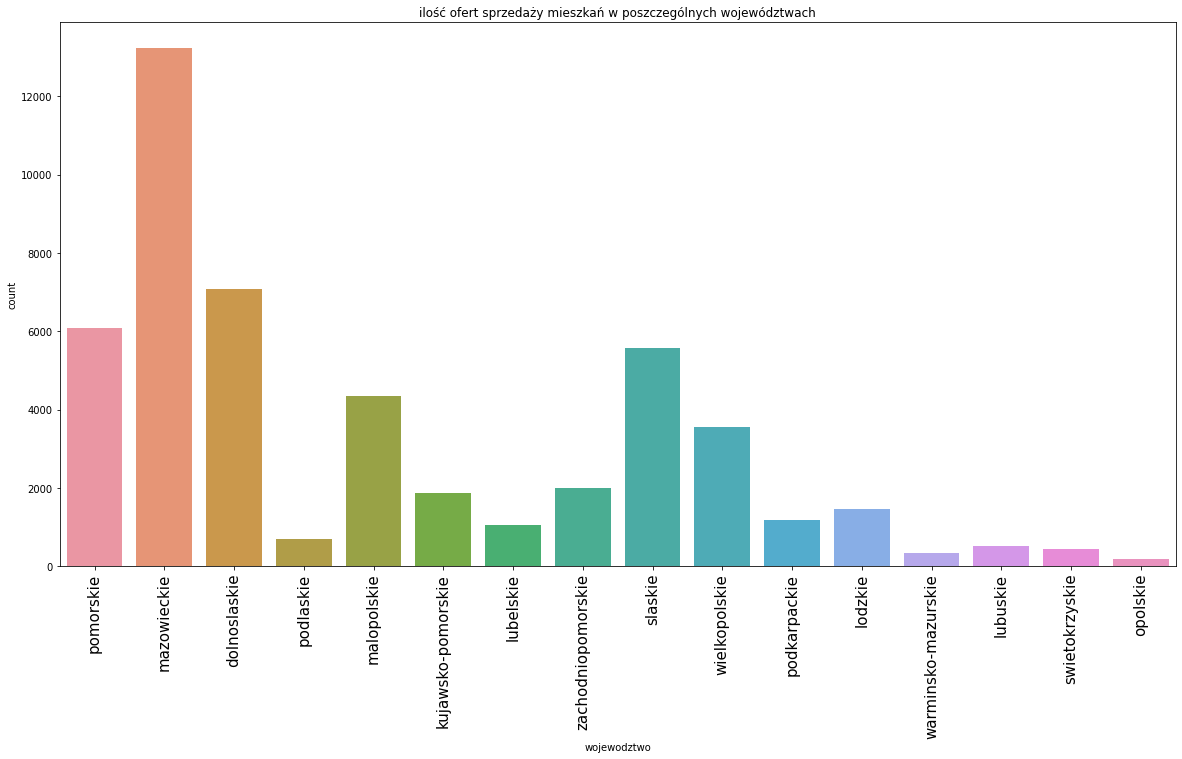

In [32]:
fig, ax = plt.subplots(figsize = (20,10))

sns.countplot(spr.wojewodztwo, ax = ax)
plt.xticks(rotation = 90, size = 15)
plt.title('ilość ofert sprzedaży mieszkań w poszczególnych województwach')

In [35]:
spr.columns

Index(['typ', 'cena', 'cena_m2', 'liczba_pokoi', 'pietro', 'rok_budowy',
       'wojewodztwo', 'miasto', 'powierzchnia'],
      dtype='object')

In [36]:
category=[('liczba_pokoi'), ('pietro'), ('rok_budowy'),('powierzchnia')]

In [38]:
print('Podaj liczbę pokoi')
liczba_pokoi = widgets.IntSlider(value = 2, min = 1, max = 20)
display(liczba_pokoi)

Podaj liczbę pokoi


IntSlider(value=2, max=20, min=1)

In [39]:
print('Podaj powierzchnię')
powierzchnia = widgets.IntRangeSlider(value= [50, 100], min = 1, max = 500)
display(powierzchnia)

Podaj powierzchnię


IntRangeSlider(value=(50, 100), max=500, min=1)

In [40]:
print('Podaj przedział cenowy')
cena = widgets.IntRangeSlider(value= [1000000, 5000000], min = 1, max = 20000000)
display(cena)

Podaj przedział cenowy


IntRangeSlider(value=(1000000, 5000000), max=20000000, min=1)

In [41]:
spr.rok_budowy.max()

32767.0

In [42]:
print('Podaj piętro')
pietro = widgets.IntSlider(value = 2, min = 0, max = 25)
display(pietro)

Podaj piętro


IntSlider(value=2, max=25)

interactive(children=(Dropdown(description='category', options=(('powierzchnia', 'powierzchnia'), ('piętro', '…

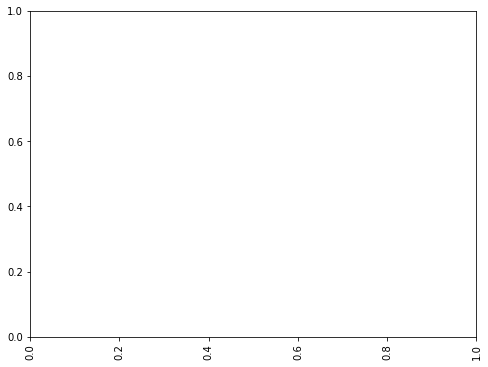

In [43]:
@widgets.interact_manual(category = [('powierzchnia', 'powierzchnia'), ('piętro', 'pietro')], 
          region = ['dolnoslaskie', 'kujawsko-pomorskie', 'lodzkie', 'lubelskie', 'lubuskie', 
                                        'malopolskie', 'mazowieckie', 'opolskie', 'podkarpackie', 'podlaskie', 
                                        'pomorskie', 'slaskie', 'swietokrzyskie', 'warminsko-mazurskie', 'wielkopolskie', 
                                        'zachodniopomorskie'])
def plot (category = 'powierzchnia', region = 'pomorskie'):
    fig, ax = plt.subplots(1,1, figsize = (8,6))
    plt.cla()
    plt.xticks(rotation=90)
    uniq, vals = spr(region, category)
    plt.bar(uniq, height=vals)
    ax.grid(grid)

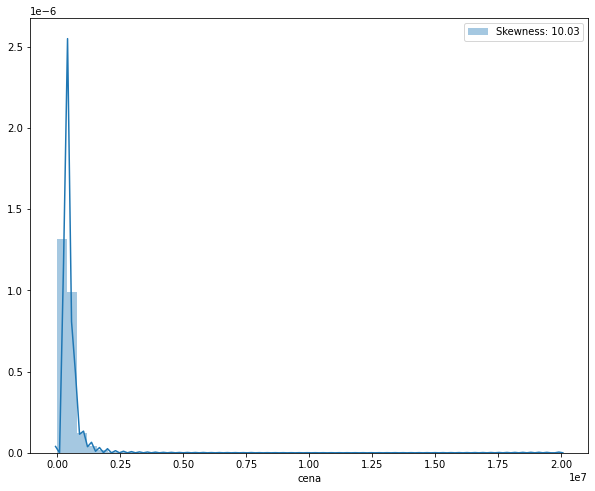

In [44]:
plt.figure(figsize=(10,8))
bar = sns.distplot(spr['cena'])
bar.legend(["Skewness: {:.2f}".format(spr['cena'].skew())]);

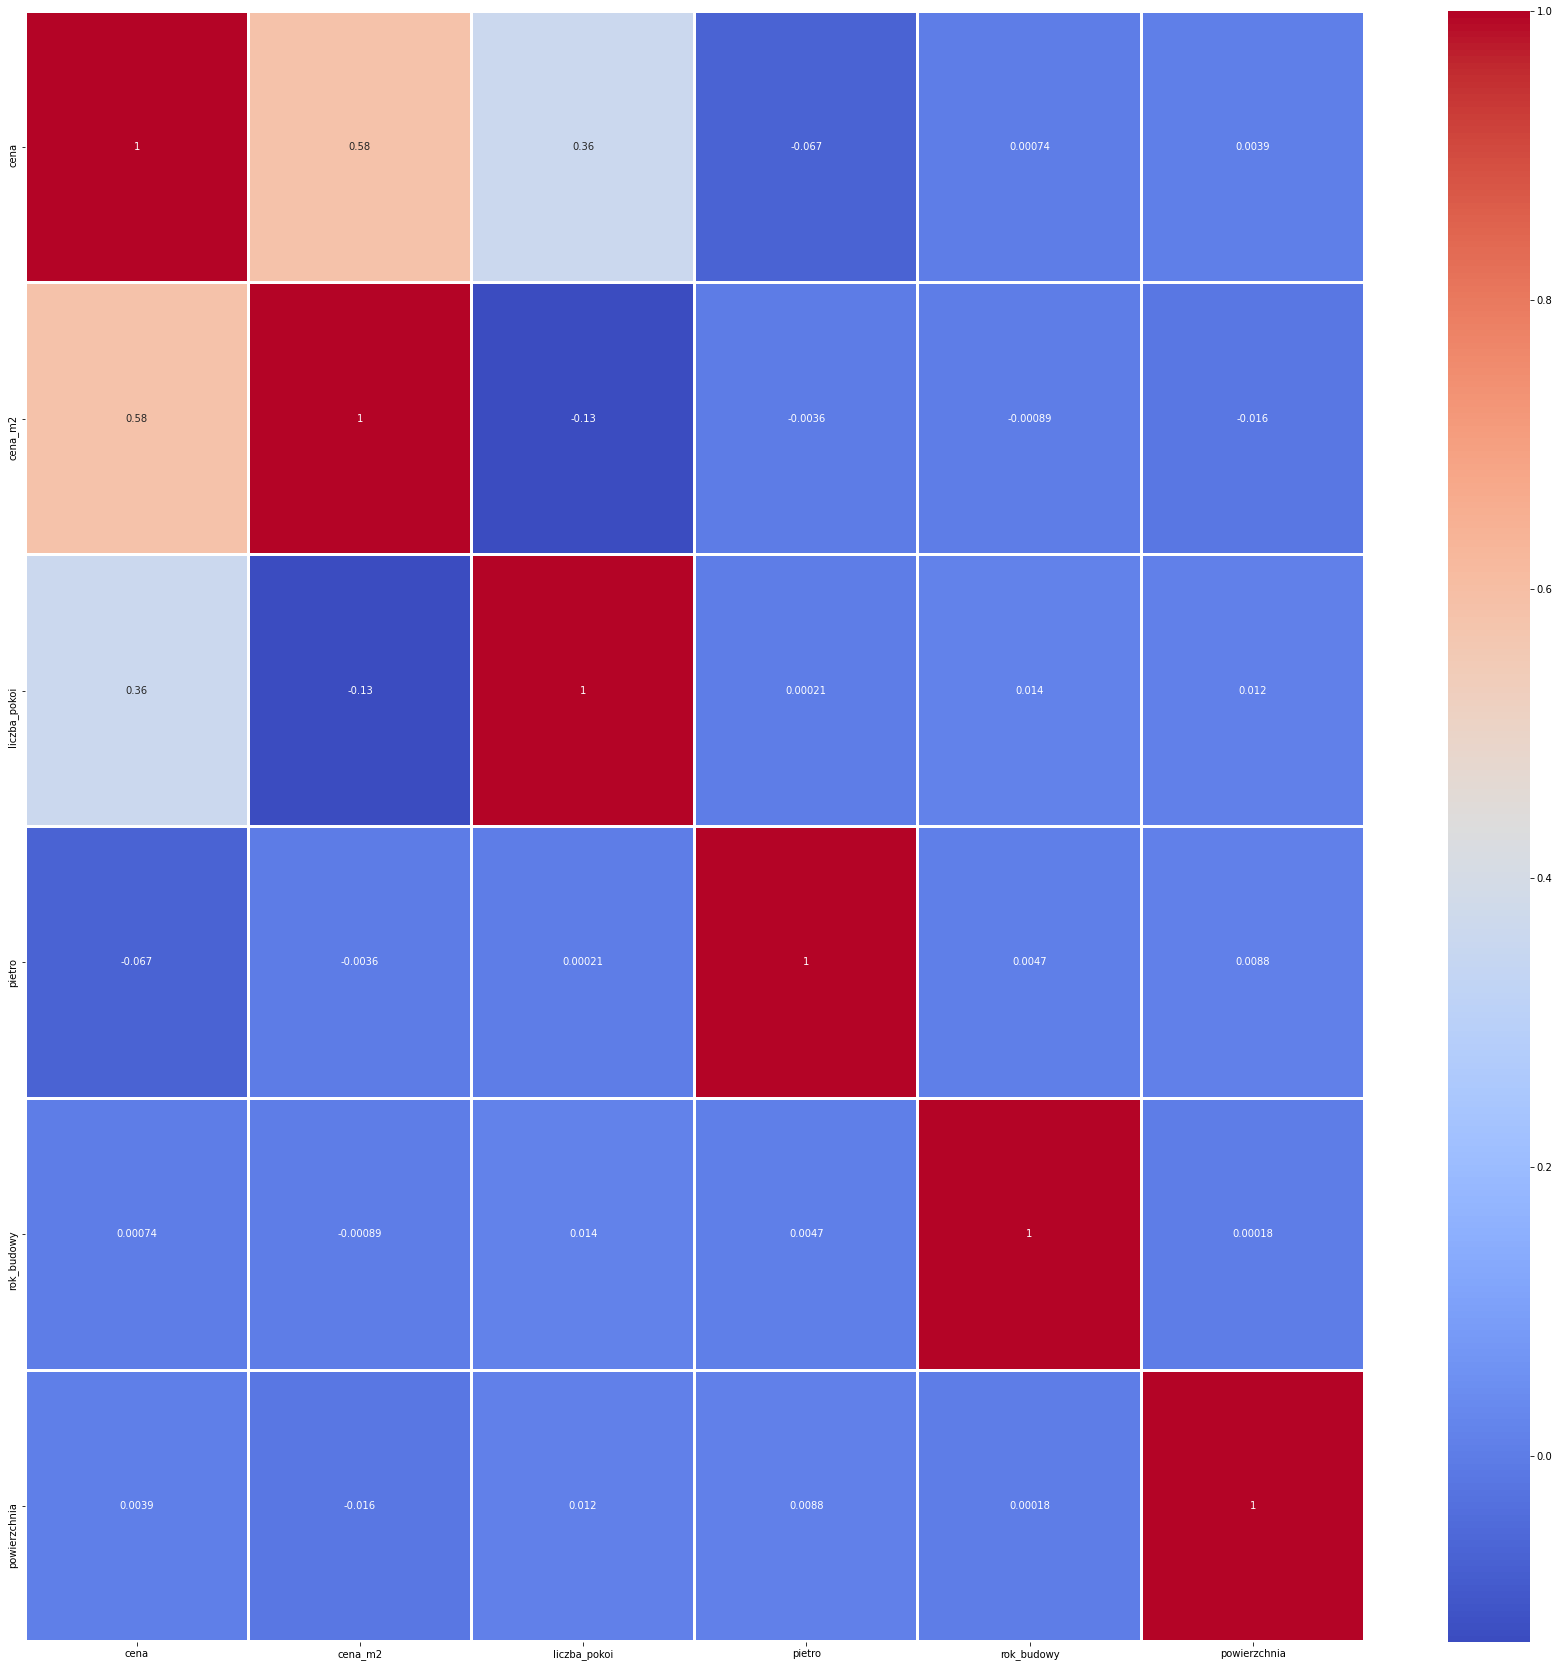

In [52]:
plt.figure(figsize=(30,30))
ax = sns.heatmap(spr.corr(), cmap = "coolwarm", annot=True, linewidth=2)

In [47]:
high_corr = spr.corr()
high_corr_features = high_corr.index[abs(high_corr["cena"]) >= 0.5]
high_corr_features

Index(['cena', 'cena_m2'], dtype='object')

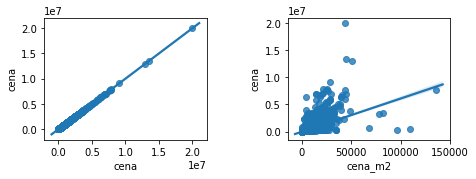

In [48]:
plt.figure(figsize=(16,9))
for i in range(len(high_corr_features)):
    if i <= 9:
        plt.subplot(3,4,i+1)
        plt.subplots_adjust(hspace = 0.5,wspace = 0.5)
        sns.regplot(data=spr, x = high_corr_features[i], y = 'cena')

In [33]:
print('Wybierz województwo')

wojewodztwo = widgets.Dropdown(options=['dolnoslaskie', 'kujawsko-pomorskie', 'lodzkie', 'lubelskie', 'lubuskie', 
                                        'malopolskie', 'mazowieckie', 'opolskie', 'podkarpackie', 'podlaskie', 'pomorskie', 
                                        'slaskie', 'swietokrzyskie', 'warminsko-mazurskie', 'wielkopolskie', 
                                        'zachodniopomorskie'])

display(wojewodztwo)

Wybierz województwo


Dropdown(options=('dolnoslaskie', 'kujawsko-pomorskie', 'lodzkie', 'lubelskie', 'lubuskie', 'malopolskie', 'ma…

In [37]:
### moje
print('Podaj wojewodztwo')
wojewodztwo = widgets.Dropdown(options=['dolnoslaskie', 'kujawsko-pomorskie', 'lodzkie', 'lubelskie', 'lubuskie', 
                                        'malopolskie', 'mazowieckie', 'opolskie', 'podkarpackie', 'podlaskie', 
                                        'pomorskie', 'slaskie', 'swietokrzyskie', 'warminsko-mazurskie', 'wielkopolskie', 
                                        'zachodniopomorskie'])
display(wojewodztwo)

Podaj wojewodztwo


Dropdown(options=('dolnoslaskie', 'kujawsko-pomorskie', 'lodzkie', 'lubelskie', 'lubuskie', 'malopolskie', 'ma…

In [ ]:
class GeneralInfo:

    def __init__(self):
        self.st = StatisticTests()
        self.df = self.st.df
        self.plot = Plots()

    def distribution_data(self, region):
        x = self.region_data(region)['cena']
        self.plot.plot_distribution(x, region)
        
    def region_data(self, region, columns=None):
        if columns is None:
            columns = ["rok_budowy"]
        df = self.spr.loc[self.df["wojewodztwo"].str.contains(region, case=False)]
        t = spr.groupby(columns).count()
        targets = spr.groupby(columns)["cena"].sum().reset_index()
        targets['pokoje'] = t['cena'].values
        t = targets['cena'] / targets['pokoje']
        targets['stopa_pokoi'] = t
        return targets
    
    def select_data_year(self, rok_bud, region, col_type):
        targets = self.region_data(region, ["rok_budowy", col_type])
        uniques = targets[col_type].unique()
        max_height = self.spr.loc[self.spr['cena'].idxmax()]
        x = targets.loc[targets["rok_budowy"] == rok_bud]
        l = [0.0] * len(uniques)
        di = dict(zip(uniques, l))
        for i, k in x.iterrows():
            w = k[col_type]
            ki = k['cena']
            di[w] = ki
        uniq = list(di.keys())
        vals = list(di.values())
        return uniq, vals
    
    def region_plots(self):
        fig, ax = plt.subplots(figsize=(20, 10))
        sns.countplot(self.spr.wojewodztwo, ax=ax)
        plt.xticks(rotation=90, size=15)
        plt.title('ilość mieszkań')
        
    def groupby_attack_type(self, il_pokoi):
        grouped_count = self.spr[['cena']].where(self.spr.liczba_pokoi == l_pokoi).groupby(
            self.spr.wojewodztwo).count()
        return grouped_count
    
    def box_plots(self):
        il_pokoi = self.st.get_uniques(["liczba_pokoi"])
        sum_cena = self.spr[['cena']].groupby(self.spr.wojewodztwo).count()
        pokoje = list()
        for pokoj in il_pokoi[0]:
            at = self.spr['cena'].where(self.spr.liczba_pokoi == pokoj).groupby(self.spr.wojewodztwo).count()
            pokoje.append(at)
            
        r = None
            for i, pokoj in enumerate(pokoje):
                if i == 0:
                    r = pd.merge(pokoje[i], pokoje[i + 1], how='left', left_on=['wojewodztwo'], right_on=['wojewodztwo'])
                elif i == len(pokoje):
                    r = pd.merge(r, sum_cena, how='left', left_on=['wojewodztwo'], right_on=['wojewodztwo'])
                else:
                    r = pd.merge(r, pokoje[i], how='left', left_on=['wojewodztwo'], right_on=['wojewodztwo'])
#             r.columns = [1,2,3,4,5,6,7,8,9,10,11]
            plot = r.boxplot(rot=90, figsize=(20, 10), fontsize=15)
            return plot
